In [8]:
import pandas as pd
import datetime
from stocklab.simulation import *

In [9]:
import random
random.random()

0.011112108067595994

In [9]:
def to_date(date):
    try:
        return datetime.datetime.strptime(date, '%Y-%m-%d %I-%p')
    except:
        return datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')


def read_data(tik):
    usd = 'USDT'
    time = '1h'
    name = f'Binance_{tik + usd}_{time}.csv'
    dfh = pd.read_csv(f'data/{name}', skiprows=1).iloc[::-1]
    dfh.head()
    dfh.reset_index(inplace=True, drop=True)
    dfh['date'] = dfh['date'].apply(lambda x: to_date(x))
    return dfh


strategy = MidDay(row_data=read_data('XRP'))
sim = Simulation(1000, strategy)
sim.row_by_row()

{'order': 'Buy', 'price': 0.28776, 'amount': 3475.0, 'balance': 0.033999999999991815, 'assets': 1000.0, 'profit': 0.0}
{'order': 'Sell', 'price': 0.30811, 'amount': 3475.0, 'balance': 1070.71625, 'assets': 2141.3985000000002, 'profit': 70.71625000000006}
{'order': 'Buy', 'price': 0.30431, 'amount': 3518.0, 'balance': 0.15366999999992004, 'assets': 1070.71625, 'profit': 0.0}
{'order': 'Sell', 'price': 0.30304, 'amount': 3518.0, 'balance': 1066.2483899999997, 'assets': 2132.34311, 'profit': -4.467860000000201}
{'order': 'Buy', 'price': 0.31139, 'amount': 3424.0, 'balance': 0.049029999999675056, 'assets': 1066.2483899999997, 'profit': 0.0}
{'order': 'Sell', 'price': 0.31264, 'amount': 3424.0, 'balance': 1070.5283899999995, 'assets': 2141.0077499999993, 'profit': 4.279999999999745}
{'order': 'Buy', 'price': 0.29914, 'amount': 3578.0, 'balance': 0.20546999999942273, 'assets': 1070.5283899999995, 'profit': 0.0}
{'order': 'Sell', 'price': 0.29956, 'amount': 3578.0, 'balance': 1072.03114999999

In [3]:
trades = sim.state.trades

In [4]:
trades_df = pd.DataFrame(trades)
trades_df

,order,price,amount,balance,assets,profit
0,Buy,0.28776,3475.0,0.03400,1000.00000,0.00000
1,Sell,0.30811,3475.0,1070.71625,2141.39850,70.71625
2,Buy,0.30431,3518.0,0.15367,1070.71625,0.00000
3,Sell,0.30304,3518.0,1066.24839,2132.34311,-4.46786
4,Buy,0.31139,3424.0,0.04903,1066.24839,0.00000
...,...,...,...,...,...,...
491,Sell,1.04960,1712.0,1797.95560,3594.87080,11.12800
492,Buy,1.04470,1721.0,0.02690,1797.95560,0.00000
493,Sell,1.04180,1721.0,1792.96470,3585.90250,-4.99090
494,Buy,1.03600,1730.0,0.68470,1792.96470,0.00000


<AxesSubplot:>

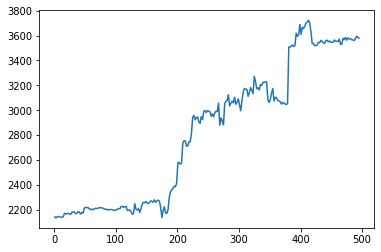

In [7]:
trades_df[trades_df.order == "Sell"]["assets"].plot()

<AxesSubplot:>

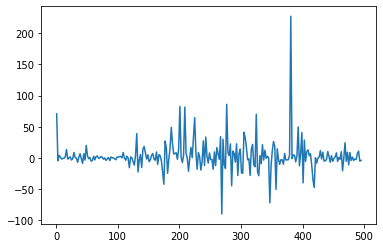

In [6]:
trades_df[trades_df.order == "Sell"]["profit"].plot()